# 004: Implement logistic regression

needs data loading, train/test split, training, evaluation

In [1]:
import sys

import numpy as np

sys.path.append("../")
import helpers
from implementations import sigmoid
from visualizations import plot_roc

%load_ext autoreload
%autoreload 2

In [ ]:
train = np.load("../data/dataset_prep/train.npz")
x_train = train["x_train"]
y_train = train["y_train"]

In [119]:
def calculate_loss(y, tx, w):
    """compute the cost by negative log likelihood.

    Args:
        y:  shape=(N, 1)
        tx: shape=(N, D)
        w:  shape=(D, 1)

    Returns:
        a non-negative loss
    """
    assert y.shape[0] == tx.shape[0]
    assert tx.shape[1] == w.shape[0]

    logits = tx @ w

    #loss = (y * np.log(pred) + (1 - y) * np.log(1 - pred))
    loss = np.maximum(logits, 0) - logits * y + np.log1p(np.exp(-np.abs(logits)))
    return np.mean(loss).item()


def calculate_gradient(y, tx, w, sample_weights=None):
    """compute the gradient of loss.

    Args:
        y:  shape=(N, 1)
        tx: shape=(N, D)
        w:  shape=(D, 1)

    Returns:
        a vector of shape (D, 1)
    """
    assert y.shape[0] == tx.shape[0]
    assert tx.shape[1] == w.shape[0]

    pred = sigmoid(tx @ w)

    if sample_weights is None:
        sample_weights = np.ones_like(y)

    gradient = tx.T @ (sample_weights * (pred - y)) / np.sum(sample_weights)

    assert gradient.shape == w.shape
    return gradient

def learning_by_gradient_descent(y, tx, w, gamma, sample_weights=None):
    """
    Do one step of gradient descent using logistic regression. Return the loss and the updated w.

    Args:
        y:  shape=(N, 1)
        tx: shape=(N, D)
        w:  shape=(D, 1)
        gamma: float

    Returns:
        loss: scalar number
        w: shape=(D, 1)
    """
    loss = calculate_loss(y, tx, w)
    w_new = w - gamma * calculate_gradient(y, tx, w, sample_weights)
    return loss, w_new

In [ ]:
def logistic_regression(y, tx, max_iter = 1000, threshold = 1e-6, gamma = 5e-1, weighting = False):
    assert np.all((y == 0) | (y == 1)), "All values in y must be 0 or 1"
    losses = []

    w = np.zeros((tx.shape[1], 1))

    if weighting:
        pos_weight = y.shape[0] / (2 * np.sum(y))
        neg_weight = y.shape[0] / (2 * np.sum(1 - y))
        sample_weights = np.where(y == 1, pos_weight, neg_weight)
    else:
        sample_weights = None

    for iter in range(max_iter):
        loss, w = learning_by_gradient_descent(y, tx, w, gamma, sample_weights)
        # log info
        if iter % 1 == 0:
            print("Current iteration={i}, loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
        print("L1 norm of w:", np.sum(np.abs(w)))
    
    print("loss={l}".format(l=calculate_loss(y, tx, w)))
    return w

In [ ]:
# (N,) <--
# (N,1)

In [126]:
max_samples = 50000

In [127]:
w = logistic_regression(y_train.reshape(-1,1)[:max_samples], x_train[:max_samples], weighting=True)

Current iteration=0, loss=0.6931471805599453
L1 norm of w: 5.688432365880778
-0.002111420219188016
0.08658
Current iteration=1, loss=0.815330766933237
L1 norm of w: 4.325680580793455
-0.06290183558317505
0.08658
Current iteration=2, loss=0.7050156782204923
L1 norm of w: 4.051737316546195
-0.11727462712514654
0.08658
Current iteration=3, loss=0.6633200719458635
L1 norm of w: 4.250883820024505
-0.165008497178243
0.08658
Current iteration=4, loss=0.6469748052071815
L1 norm of w: 4.466683995763189
-0.2094452129625287
0.08658
Current iteration=5, loss=0.633343593219924
L1 norm of w: 4.681171462480545
-0.25105913115055434
0.08658
Current iteration=6, loss=0.621134914179058
L1 norm of w: 4.883765396161667
-0.2900248103483048
0.08658
Current iteration=7, loss=0.6100850565559479
L1 norm of w: 5.080522729844999
-0.3265101335906511
0.08658
Current iteration=8, loss=0.6000709517228529
L1 norm of w: 5.2723710289943
-0.36068846492265366
0.08658
Current iteration=9, loss=0.5909840704052916
L1 norm of

In [17]:
import matplotlib.pyplot as plt 

(array([15045.,  7647.,  5278.,  4219.,  3637.,  3416.,  3037.,  3063.,
         2761.,  1897.]),
 array([3.90340514e-05, 9.98699052e-02, 1.99700776e-01, 2.99531648e-01,
        3.99362519e-01, 4.99193390e-01, 5.99024261e-01, 6.98855132e-01,
        7.98686003e-01, 8.98516875e-01, 9.98347746e-01]),
 <BarContainer object of 10 artists>)

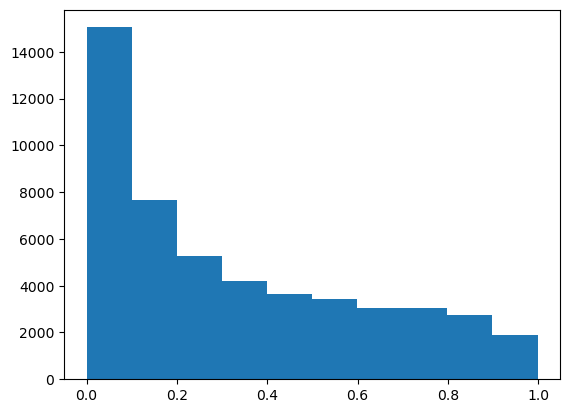

In [128]:
plt.hist(sigmoid(x_train[:max_samples] @ w))

Threshold: 0.00, F1 Score: 0.1641
Threshold: 0.05, F1 Score: 0.1935
Threshold: 0.10, F1 Score: 0.2232
Threshold: 0.15, F1 Score: 0.2470
Threshold: 0.20, F1 Score: 0.2683
Threshold: 0.25, F1 Score: 0.2897
Threshold: 0.30, F1 Score: 0.3090
Threshold: 0.35, F1 Score: 0.3267
Threshold: 0.40, F1 Score: 0.3428
Threshold: 0.45, F1 Score: 0.3606
Threshold: 0.50, F1 Score: 0.3791
Threshold: 0.55, F1 Score: 0.3914
Threshold: 0.60, F1 Score: 0.4015
Threshold: 0.65, F1 Score: 0.4089
Threshold: 0.70, F1 Score: 0.4139
Threshold: 0.75, F1 Score: 0.4124
Threshold: 0.80, F1 Score: 0.4027
Threshold: 0.85, F1 Score: 0.3709
Threshold: 0.90, F1 Score: 0.2976
Threshold: 0.95, F1 Score: 0.1600
Threshold: 1.00, F1 Score: 0.0000


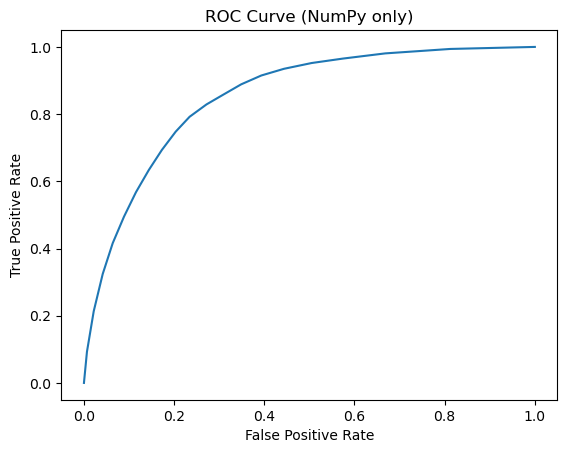

In [ ]:
y_score = sigmoid(x_train[max_samples:max_samples * 2] @ w)
y_true = y_train[max_samples:max_samples * 2].reshape(-1,1).astype(int)
plot_roc(y_score, y_true)

# make predictions on test set

In [ ]:
test = np.load("../data/dataset_prep/test.npz")
x_test = test["x_test"]
test_ids = test["test_ids"]


In [133]:
x_test.shape

(109379, 316)

In [144]:
pred = (2 * ((sigmoid(x_test @ w) > 0.7) - 0.5)).astype(int).reshape(-1)

In [145]:
helpers.create_csv_submission(test_ids, pred, "../data/logistic_regression.csv")